## Linear Regression
The most basic Machine Learning model. Easy to interpret and very useful. [Here](https://balavenkatesh.medium.com/ten-minutes-to-learn-linear-regression-for-dummies-5469038f4781) is an intermediat read about it.

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


The linear model has the formula:
* y = a * X + b
<br>

#### Where:
b is the 'intercept': where the regression line crosses the y axis;<br>
a is the 'coeficient': it's what your model will calculate;<br>
X is a value from a columns.

In [14]:
X = data.drop(['TARGET_D'], axis=1)
y = data['TARGET_D']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:56:52   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4835   BIC:                         3.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2092      0.503     12.346      0.0

In [6]:
# sklearn's LR model

X = data.drop(['TARGET_D'], axis=1) # watch out, rookie mistake, don't use your target to train the model
y = data['TARGET_D'] # what you'll want to predict

lm = LinearRegression() # start the model object
model = lm.fit(X,y) # fit your regression line / train the model
# lm.coef_ # lm.intercept_

In [27]:
# evaluating sklearn's LR model

predictions = lm.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

R2_score: 0.27
RMSE: 10.616662758427262


In [ ]:
# Analyzing results

# hint: to analyse your results, it might be a good idea to add your predictions to your dataframe


<AxesSubplot:xlabel='IC1', ylabel='TARGET_D'>

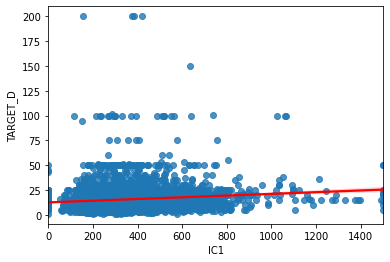

In [60]:
sns.regplot(X['IC1'], y, line_kws={"color": "red"})

<AxesSubplot:xlabel='TARGET_D'>

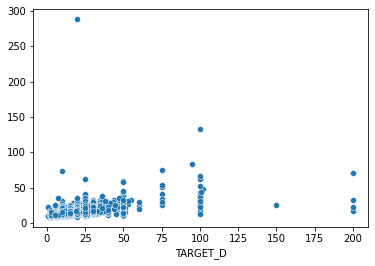

In [64]:
sns.scatterplot(y,predictions)

<AxesSubplot:xlabel='TARGET_D', ylabel='TARGET_D'>

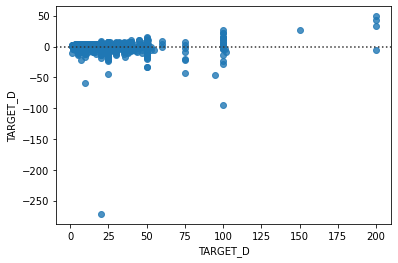

In [65]:
residuals = y - predictions
sns.residplot(y,residuals)

### Assumptions behind [linear regression](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html) 